### Statistics Assignment-4 (Hypothesis Testing)
### EXERCISE 1.
The hourly wages in a particular industry are normally distributed with mean <code> $13.20 and standard deviation $2.50. </code> A company in this industry employs 40 workers, paying them an average of <code>$12.20 </code> per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test.

In [10]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt

In [4]:
Mu = 13.20
Sigma = 2.5
n = 40
alpha = 0.01
xbar = 12.20

Null Hypotesis : Mean of wages H0 = 13.20
Alternative Hypotesis:  Mean of wages H0 < 13.20

Since variable continuous, N> 30 and sd is also known; we choose one sample z-test.


In [7]:
z = (12.20-13.20)/(2.5/sqrt(n))
z

-2.5298221281347035

In [8]:
pvalue = stats.norm.cdf(z)
pvalue

0.005706018193000826

In [9]:
if pvalue < alpha:
    print("Reject the Null Hypotesis")
else:
    print("Fail to Reject Null Hypotesis")

Reject the Null Hypotesis


### EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Null Hypotesis :  MU1 = Mu2 <br>
Alternative Hypotesis: MU1 != Mu2

In [12]:
soil = pd.read_csv('soil - Sheet1.csv')

In [13]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [14]:
soil.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


2 contionous variable samples and samples are independent, n1=30 I'm choosin pooled t test

In [15]:
tscore, p_value = stats.ttest_ind(soil["Soil1"].dropna(), soil["Soil2"].dropna())
print("tscore : {}, p_value: {}".format(tscore,p_value))

tscore : 5.1681473319343345, p_value: 2.59322873235282e-06


In [16]:
alpha = 0.01

if p_value < alpha:
    print("Reject the Null Hypotesis")
else:
    print("Fail to reject Nul Hypotesis")

Reject the Null Hypotesis


### EXERCISE 3.

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [17]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [31]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [19]:
df["Continent_Code"].value_counts()

EU    37
AS    17
SA     7
AF     2
OC     2
Name: Continent_Code, dtype: int64

In [20]:
df.groupby("Continent_Code").mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [21]:
df.groupby("Continent_Code").std()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,7.297226,5.099513,7.916909,7.536556
AS,21.086060,64.356490,57.048962,56.671371
EU,12.425773,35.150403,37.720545,34.450616
OC,2.589686,0.938401,4.504341,2.340241
SA,9.772455,18.128894,19.709688,18.470319


In [22]:
df.groupby("Continent_Code").median()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.21210,355.45740,381.07425
AS,74.000000,459.81600,433.54230,456.48360
EU,76.184000,489.72870,487.25010,490.22500
OC,86.391704,494.55975,506.08565,511.64870
SA,64.289000,409.03330,425.30310,424.59050


In [23]:
df.groupby("Continent_Code").agg(stats.mode)

,Country Code,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,,
AF,"([DZA], [1])","([38.2], [1])","([359.6062], [1])","([349.8593], [1])","([375.7451], [1])"
AS,"([ARE], [1])","([21.97606771], [1])","([380.259], [1])","([346.54900000000004], [1])","([386.4854], [1])"
EU,"([ALB], [1])","([53.74497914], [1])","([371.3114], [1])","([351.7415], [1])","([383.6824], [1])"
OC,"([AUS], [1])","([84.56051935], [1])","([493.8962], [1])","([502.9006], [1])","([509.9939], [1])"
SA,"([ARG], [1])","([40.9], [1])","([377.0695], [1])","([397.5414], [1])","([396.6836], [1])"


In [24]:
EU = df[df["Continent_Code"]=="EU"]["Math"].reset_index(drop = True)
EU.head()

0    413.1570
1    496.7423
2    506.9844
3    441.1899
4    521.2506
Name: Math, dtype: float64

In [25]:
AS=df[df["Continent_Code"]=="AS"]["Math"].reset_index(drop = True)
AS.head()

0    427.4827
1    531.2961
2    403.8332
3    547.9310
4    386.1096
Name: Math, dtype: float64

H0 : Mu1=Mu2
H1 : Mu1!=Mu2


In [26]:
alpha = 0.05

In [27]:
stats.ttest_ind(EU,AS)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [28]:
tscore, p_value = stats.ttest_ind(EU,AS)
print("tscore : {}, p_value: {}".format(tscore, p_value))

tscore : 0.870055317967983, p_value: 0.38826888111307345


In [29]:
alpha = 0.05

if p_value < alpha:
    print("Reject the Null Hypotesiz so we can say there is a difference (on the average) among \
    European (EU) and Asian (AS) countries for the math scores.")
else:
    print("Fail to reject Null hypotesis, so we can't say there is a difference (on the average) \n \
    among European (EU) and Asian (AS) countries for the math scores.")

Fail to reject Null hypotesis, so we can't say there is a difference (on the average) 
     among European (EU) and Asian (AS) countries for the math scores.


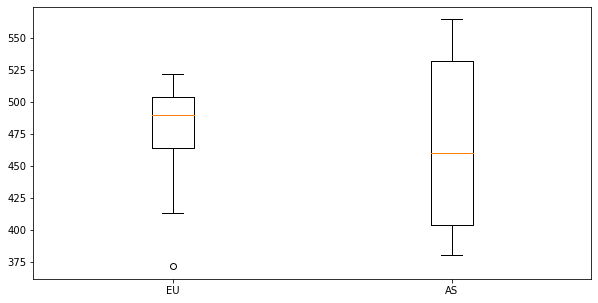

In [34]:
labels = ["EU","AS"]
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(list([EU,AS]))
ax.set_xticklabels(labels);